## Check the splirt data clustering

In [ ]:
import os
os.environ["MPICH_GPU_SUPPORT_ENABLED"] = "0"
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join,Column
from pathlib import Path

import lsstypes as types

In [23]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_clustering.dat.fits'

cat = Table.read(cat_fn)

# np.mean(cat['WEIGHT_SYS'])
np.mean(cat['WEIGHT_FKP'])

KeyError: 'WEIGHT_FKP'

In [25]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_SGC_clustering.dat.fits'

cat = Table.read(cat_fn)

np.mean(cat['WEIGHT_FKP'])

np.float64(0.8674770880671324)

In [26]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_NGC_clustering.dat.fits'

cat = Table.read(cat_fn)

np.mean(cat['WEIGHT_FKP'])

np.float64(0.8684883448977905)

In [2]:
def load_mesh2_spectrum_poles(filename):
    result = types.read(filename)
    k = result.get(ells=0).coords('k')
    Pk = {ell: result.get(ells=ell).values() for ell in result.ells}
    return k, Pk

In [ ]:
fn =  '/pscratch/sd/s/shengyu/Y3/blinded/test/window_mesh2_spectrum_poles_LRG_z0.4-0.6_GCcomb_default_fkp.h5'

result = types.read(fn)

zeff = 0
for pole in result.theory: zeff += pole._meta['z']


0.5096525952978979

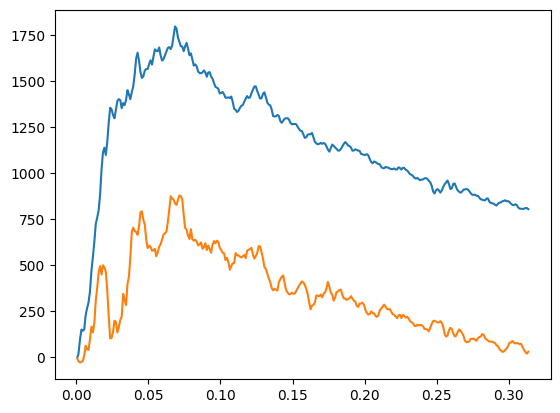

In [3]:
fn =  '/pscratch/sd/s/shengyu/Y3/blinded/test/mesh2_spectrum_poles_LRG_z0.4-0.6_NGC_default_fkp.h5'

k, Pk = load_mesh2_spectrum_poles(fn)

for ell in [0,2]:
    plt.plot(k,k*Pk[ell]['value'])

In [ ]:

def get_measurement_fn(kind='mesh2_spectrum_poles', version='test', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, weight_type='default_fkp', **kwargs):
    # base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/')
    base_dir = Path('/pscratch/sd/s/shengyu/Y3/')
    base_dir = base_dir / (f'blinded_{recon}' if recon else 'blinded')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{version}/{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}.h5')


(kmin, kmax, kbin, lenk) = load_bins('pk', 'y3_blinding')

data = types.read(get_measurement_fn(**data_args, kind='mesh2_spectrum_poles')) 
window = types.read(get_measurement_fn(**data_args, kind='window_mesh2_spectrum_poles')) 
covariance = types.read(get_measurement_fn(**data_args, kind='covariance_mesh2_spectrum_poles')) 

ells = [0,2]
sl = slice(0, None, 5)  # rebin to dk = 0.005 h/Mpc
oklim = (0.02, 0.2)  # fitted k-range, no need to go to higher k
mean = data.select(k=sl).select(k=oklim).get(ells)
wmatrix = window.at.observable.match(mean).at.theory.match(data.select(k=(0., 1.1 * oklim[1])).get(ells))
covariance = covariance.at.observable.match(mean)